<a href="https://colab.research.google.com/github/shubhamshri9/hjh/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/'

In [ ]:
data= pd.read_csv(file_path +'Copy of Global Terrorism Data.csv', encoding='latin-1')

NameError: ignored

In [ ]:
# encoding of dataset
import chardet
with open(file_path, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(1000000)) 
result    

{'confidence': 0.73, 'encoding': 'Windows-1252', 'language': ''}

In [ ]:
new_rawdata = pd.read_csv(file_path, encoding = 'Windows-1252', low_memory = False)
new_rawdata.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
# create checkpoint
data = new_rawdata.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#find total no of null values
data.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [ ]:
# find all columns with null values
nan_values = data.isna()
nan_columns = nan_values.any()
columns_with_nan = data.columns[nan_columns].tolist()
columns_with_nan

['approxdate',
 'resolution',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'location',
 'summary',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'nperps',
 'nperpcap',
 'claimed',
 'claimmode',
 'claimmode_txt',
 'claim2',
 'claimmode2',
 'claimmode2_txt',
 'claim3',
 'claimmode3',
 'claimmode3_txt',
 'compclaim',
 'weapsubtype1',
 'weapsubtype1_txt',
 'weaptype2',
 'weaptype2_txt',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype3',


In [ ]:
# rename columns for better understanding

data.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country', 'provstate':'State','region_txt':'Region', 'attacktype1_txt':'Attacktype', 'targtype1_txt':'Targettype', 'gname':'Group', 'nkill':'Kill','weaptype1_txt':'Weapon', 'nwound':'Wound'}, inplace= True)

In [ ]:
# Consider only those columns which are necessary for Analysis

data = data[['Year','Month','Day','Country','State','Region','city','latitude','longitude','Attacktype','Targettype','Group','Weapon','Wound','Kill','motive','summary']]

In [ ]:
data.head()

,Year,Month,Day,Country,State,Region,city,latitude,longitude,Attacktype,Targettype,Group,Weapon,Wound,Kill,motive,summary
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,MANO-D,Unknown,0.0,1.0,NaN,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0,NaN,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Unknown,Unknown,0.0,1.0,NaN,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN,NaN,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN,NaN,NaN


In [ ]:
data.count()

Year          181691
Month         181691
Day           181691
Country       181691
State         181270
Region        181691
city          181257
latitude      177135
longitude     177134
Attacktype    181691
Targettype    181691
Group         181691
Weapon        181691
Wound         165380
Kill          171378
motive         50561
summary       115562
dtype: int64

In [ ]:
data.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State            421
Region             0
city             434
latitude        4556
longitude       4557
Attacktype         0
Targettype         0
Group              0
Weapon             0
Wound          16311
Kill           10313
motive        131130
summary        66129
dtype: int64

In [ ]:
missing_percentage = data.isnull().sum() * 100 / len(data)
missing_percentage

Year           0.000000
Month          0.000000
Day            0.000000
Country        0.000000
State          0.231712
Region         0.000000
city           0.238867
latitude       2.507554
longitude      2.508104
Attacktype     0.000000
Targettype     0.000000
Group          0.000000
Weapon         0.000000
Wound          8.977330
Kill           5.676120
motive        72.171984
summary       36.396409
dtype: float64

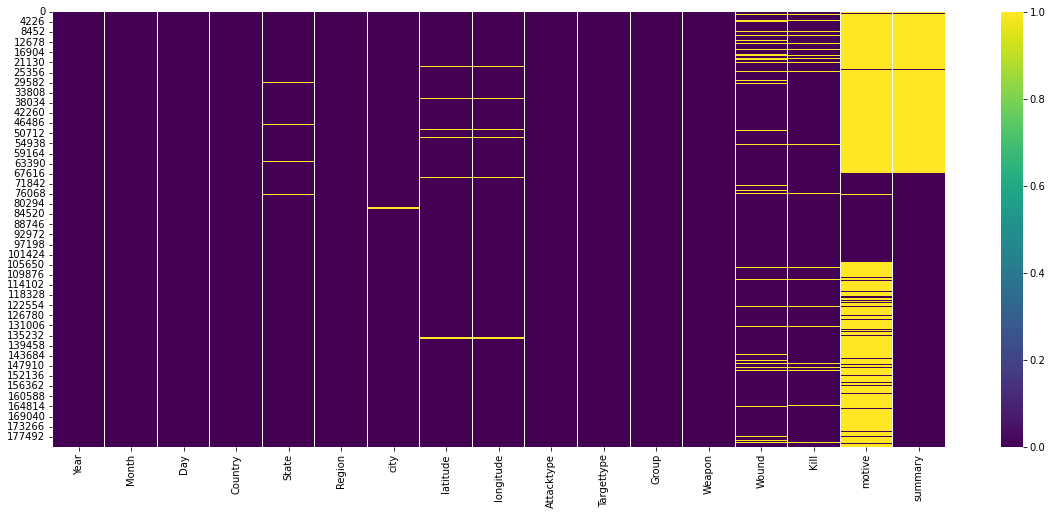

In [ ]:
sns.heatmap(data.isnull(), yticklabels="auto",cbar= "auto", cmap='viridis')

**CONCLUSION**

Null columns in our datasets are:
1.Latitude
2.Longitude
3.Wound
4.Kill
5.Motive
6.Summary

Most null values are in Motive and Summary so we drop it.
Latitude and Longitude has no use in our analysis so we drop it


In [ ]:
data['Wound']=data['Wound'].fillna(0)
data['Kill']=data['Kill'].fillna(0)
data['Casualities']= data['Wound']+data['Kill']

In [ ]:
data['State'].fillna("unknown",inplace=True)
data['city'].fillna("unknown",inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
data.head()

,Year,Month,Day,Country,State,Region,city,latitude,longitude,Attacktype,Targettype,Group,Weapon,Wound,Kill,motive,summary,Casualities
0,1970,7,2,Dominican Republic,unknown,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,MANO-D,Unknown,0.0,1.0,NaN,NaN,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0,NaN,NaN,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Unknown,Unknown,0.0,1.0,NaN,NaN,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,0.0,0.0,NaN,NaN,0.0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,0.0,0.0,NaN,NaN,0.0


In [ ]:
data.dropna(axis=1,inplace=True)
data.head(100)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Year,Month,Day,Country,State,Region,city,Attacktype,Targettype,Group,Weapon,Wound,Kill,Casualities
0,1970,7,2,Dominican Republic,unknown,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,Unknown,0.0,1.0,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,Unknown,0.0,1.0,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,0.0,0.0,0.0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1970,2,28,Jordan,Khalil,Middle East & North Africa,Hebron,Armed Assault,Tourists,Unknown,Firearms,0.0,0.0,0.0
96,1970,3,0,Philippines,Metropolitian Manila,Southeast Asia,Manila,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,0.0,0.0,0.0
97,1970,3,1,Italy,Lazio,Western Europe,Rome,Bombing/Explosion,Airports & Aircraft,Eritrean Liberation Front,Explosives,0.0,0.0,0.0
98,1970,3,1,United States,Colorado,North America,Boulder,Bombing/Explosion,Military,Student Radicals,Explosives,0.0,0.0,0.0


In [ ]:
data.describe()

,Year,Month,Day,Wound,Kill,Casualities
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,2.883296,2.266860,5.150156
std,13.259430,3.388303,8.814045,34.309747,11.227057,40.555416
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,8191.000000,1570.000000,9574.000000


Text(0.5, 0, 'Country Name')

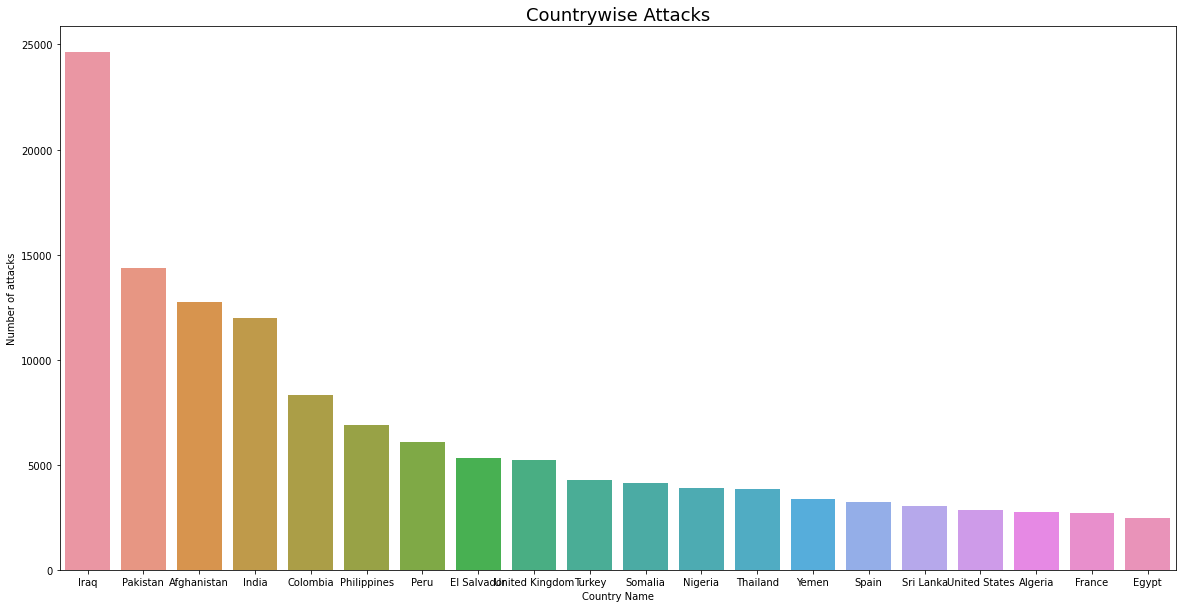

In [ ]:
#Countrywise Attacks
plt.rcParams['figure.figsize'] = (20, 10)
sns.barplot(x=data['Country'].value_counts()[:20].index,y=data['Country'].value_counts()[:20].values)
plt.title('Countrywise Attacks',fontsize=18)
plt.ylabel('Number of attacks')
plt.xlabel('Country Name')

Text(0.5, 0, 'Months')

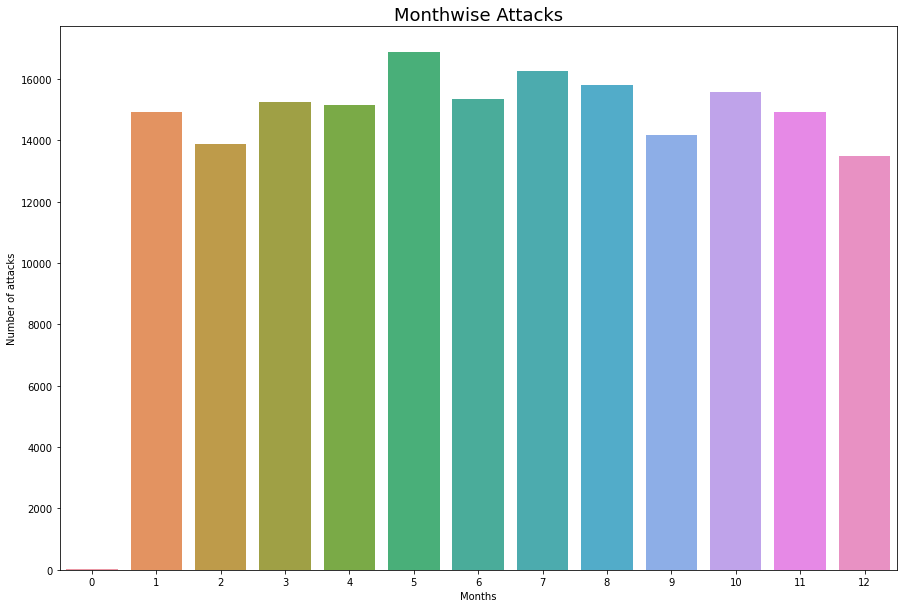

In [ ]:
#Monthwise Attacks
plt.rcParams['figure.figsize'] = (15, 10)
sns.barplot(x=data['Month'].value_counts()[:20].index,y=data['Month'].value_counts()[:20].values)
plt.title('Monthwise Attacks',fontsize=18)
plt.ylabel('Number of attacks')
plt.xlabel('Months')

Text(0.5, 0, 'Name of a Group')

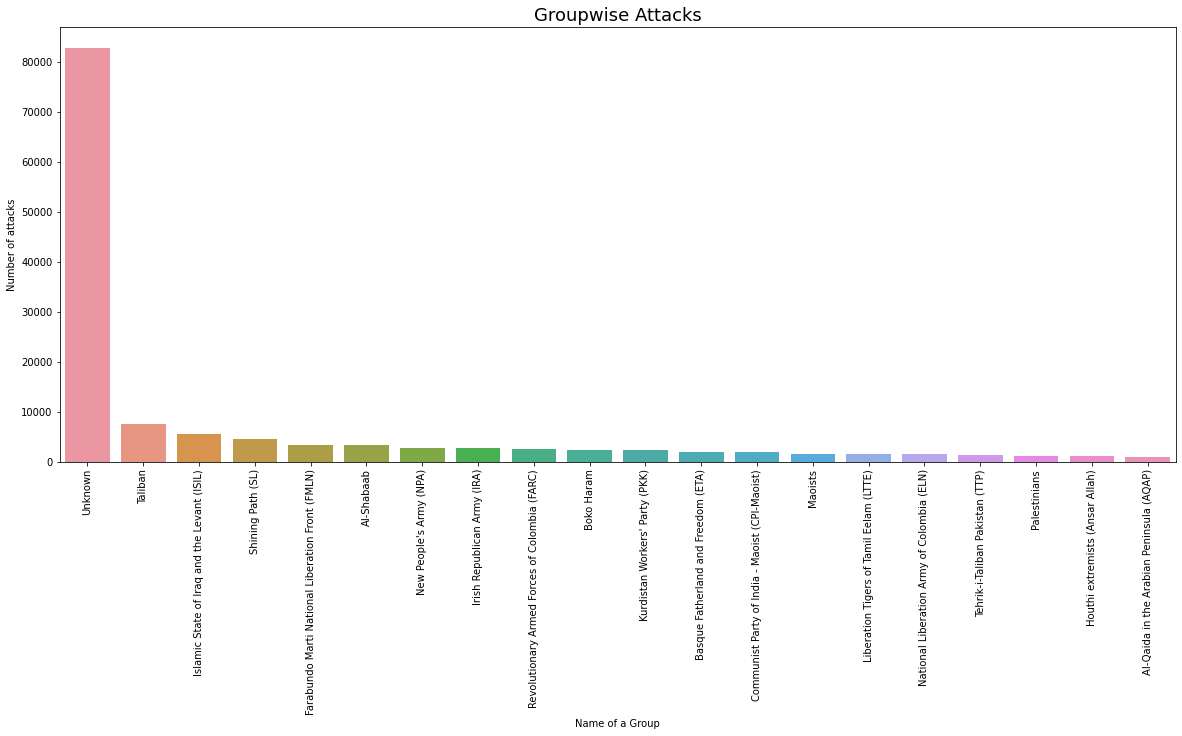

In [ ]:
#Groupwise Attacks
plt.rcParams['figure.figsize'] = (20, 8)
sns.barplot(x=data['Group'].value_counts()[:20].index,y=data['Group'].value_counts()[:20].values)
plt.title('Groupwise Attacks',fontsize=18)
plt.ylabel('Number of attacks')
plt.xticks(rotation=90)
plt.xlabel('Name of a Group')

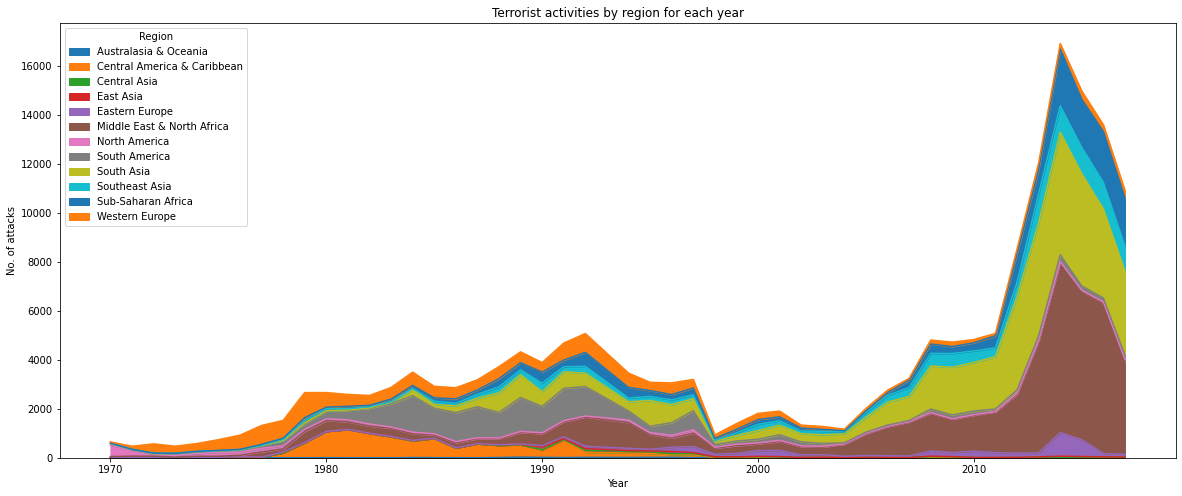

In [ ]:
#Regionwise attack

pd.crosstab(data.Year,data.Region).plot(kind='area',stacked=True)
plt.title('Terrorist activities by region for each year')
plt.ylabel('No. of attacks')

plt.show()


In [ ]:
pd.crosstab(data.Year,data.Region)

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317
1975,0,9,0,12,0,44,159,55,4,7,12,438
1976,0,45,0,2,0,55,125,91,4,12,11,578
1977,0,24,0,4,2,211,149,119,2,8,29,771
1978,2,199,0,35,2,128,117,222,2,44,46,729


In [ ]:
group= data[['Country','Group','Kill']]
group=group.groupby(['Country','Group'],axis=0).sum().sort_values('Kill',ascending=False).reset_index()
group.head(10)

,Country,Group,Kill
0,Iraq,Unknown,38560.0
1,Iraq,Islamic State of Iraq and the Levant (ISIL),31058.0
2,Afghanistan,Taliban,29269.0
3,Nigeria,Boko Haram,16917.0
4,Pakistan,Unknown,12023.0
5,Peru,Shining Path (SL),11595.0
6,Sri Lanka,Liberation Tigers of Tamil Eelam (LTTE),10928.0
7,Somalia,Al-Shabaab,8176.0
8,El Salvador,Farabundo Marti National Liberation Front (FMLN),8019.0
9,Afghanistan,Unknown,7398.0


Text(0.5, 1.0, 'Deaths in attack')

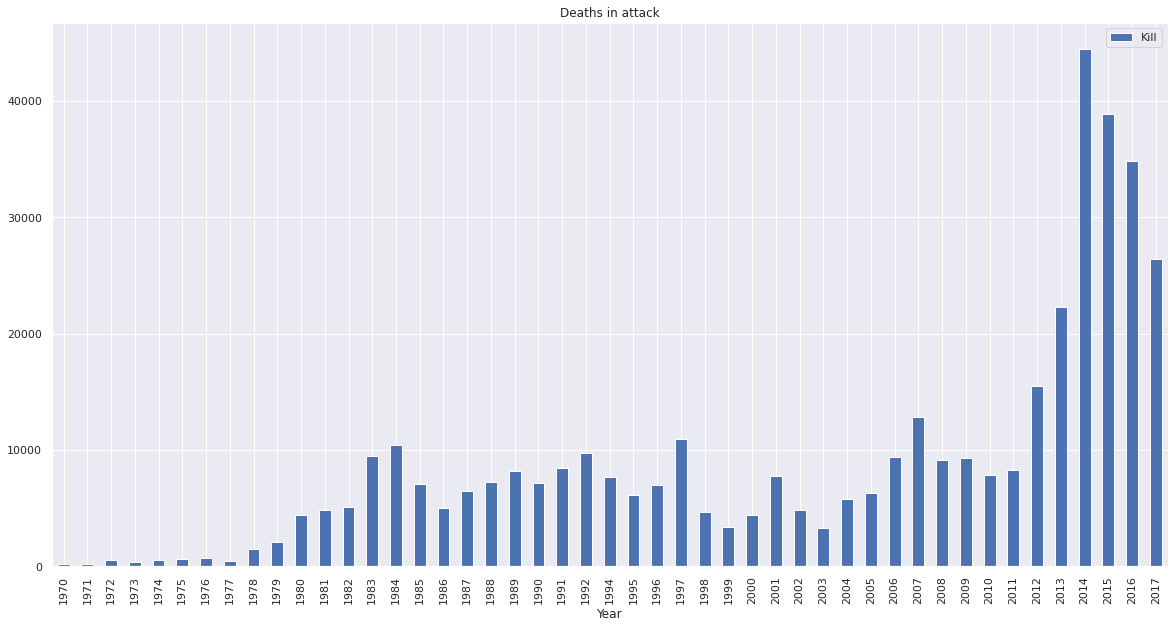

In [ ]:
#Deaths in attack per year

deaths=data[['Year','Kill']].groupby(['Year']).sum()

fig, ax2=plt.subplots(figsize=(20,10))
deaths.plot(kind="bar", ax=ax2)
plt.title('Deaths in attack')







Text(0.5, 1.0, 'Deaths in attack')

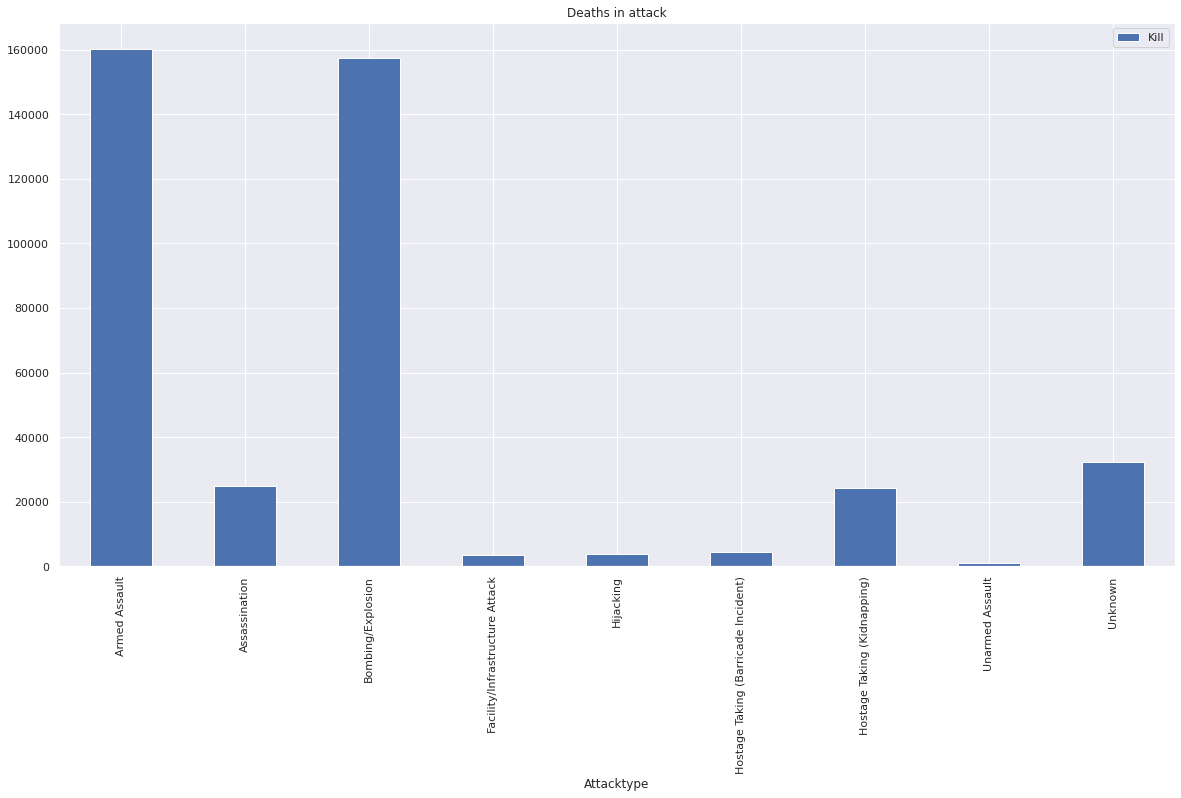

In [ ]:
#Deaths in attack according to Attacktype

data[['Attacktype','Kill']].groupby(['Attacktype']).sum().plot(kind="bar", figsize=(20,10))

plt.title('Deaths in attack')
